In [ ]:
import pandas as pd
company = pd.read_csv('Company_Data (1).csv')
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [ ]:
mean = company['Sales'].mean()
for i in range(len(company['Sales'])):
    if company.iloc[i,0] > mean:
        company.iloc[i,0] = 'High'
    else:
        company.iloc[i,0] = 'low'
        
company['Def'] = company['CompPrice']-company['Price']
company = company[['CompPrice','Price','Def','Income','Advertising','Population','ShelveLoc','Age','Education','Urban','US','Sales']]
company

,CompPrice,Price,Def,Income,Advertising,Population,ShelveLoc,Age,Education,Urban,US,Sales
0,138,120,18,73,11,276,Bad,42,17,Yes,Yes,High
1,111,83,28,48,16,260,Good,65,10,Yes,Yes,High
2,113,80,33,35,10,269,Medium,59,12,Yes,Yes,High
3,117,97,20,100,4,466,Medium,55,14,Yes,Yes,low
4,141,128,13,64,3,340,Bad,38,13,Yes,No,low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,128,10,108,17,203,Good,33,14,Yes,Yes,High
396,139,120,19,23,3,37,Medium,55,11,No,Yes,low
397,162,159,3,26,12,368,Medium,40,18,Yes,Yes,low
398,100,95,5,79,7,284,Bad,50,12,Yes,Yes,low


In [ ]:
copy = company.copy()
copy['Sales'] = copy['Sales'].map({'High':0,'low':1})
copy['ShelveLoc'] = copy['ShelveLoc'].map({'Good':0,'Medium':1,'Bad':2})
copy['Urban'] = copy['Urban'].map({'Yes':1,'No':0})
copy['US'] = copy['US'].map({'Yes':1,'No':0})
copy

,CompPrice,Price,Def,Income,Advertising,Population,ShelveLoc,Age,Education,Urban,US,Sales
0,138,120,18,73,11,276,2,42,17,1,1,0
1,111,83,28,48,16,260,0,65,10,1,1,0
2,113,80,33,35,10,269,1,59,12,1,1,0
3,117,97,20,100,4,466,1,55,14,1,1,1
4,141,128,13,64,3,340,2,38,13,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,128,10,108,17,203,0,33,14,1,1,0
396,139,120,19,23,3,37,1,55,11,0,1,1
397,162,159,3,26,12,368,1,40,18,1,1,1
398,100,95,5,79,7,284,2,50,12,1,1,1


In [ ]:
copy[copy['Sales']==1]['Urban'].value_counts()

1    146
0     55
Name: Urban, dtype: int64

In [ ]:
copy[copy['Sales']==1]['Urban'].value_counts()[1]*100/copy[copy['Sales']==1]['Urban'].value_counts().sum()

72.636815920398

In [ ]:
copy[copy['Sales']==1]['US'].value_counts()[1]*100/copy[copy['Sales']==1]['US'].value_counts().sum()

57.711442786069654

In [ ]:
company[company['Sales']=='High']['ShelveLoc'].value_counts()*100/company[company['Sales']=='High']['ShelveLoc'].value_counts().sum()

Medium    51.758794
Good      36.180905
Bad       12.060302
Name: ShelveLoc, dtype: float64

72% of high sales are from urban area

5% of high sales are in us

only 12% of high sales come from bad shelve location

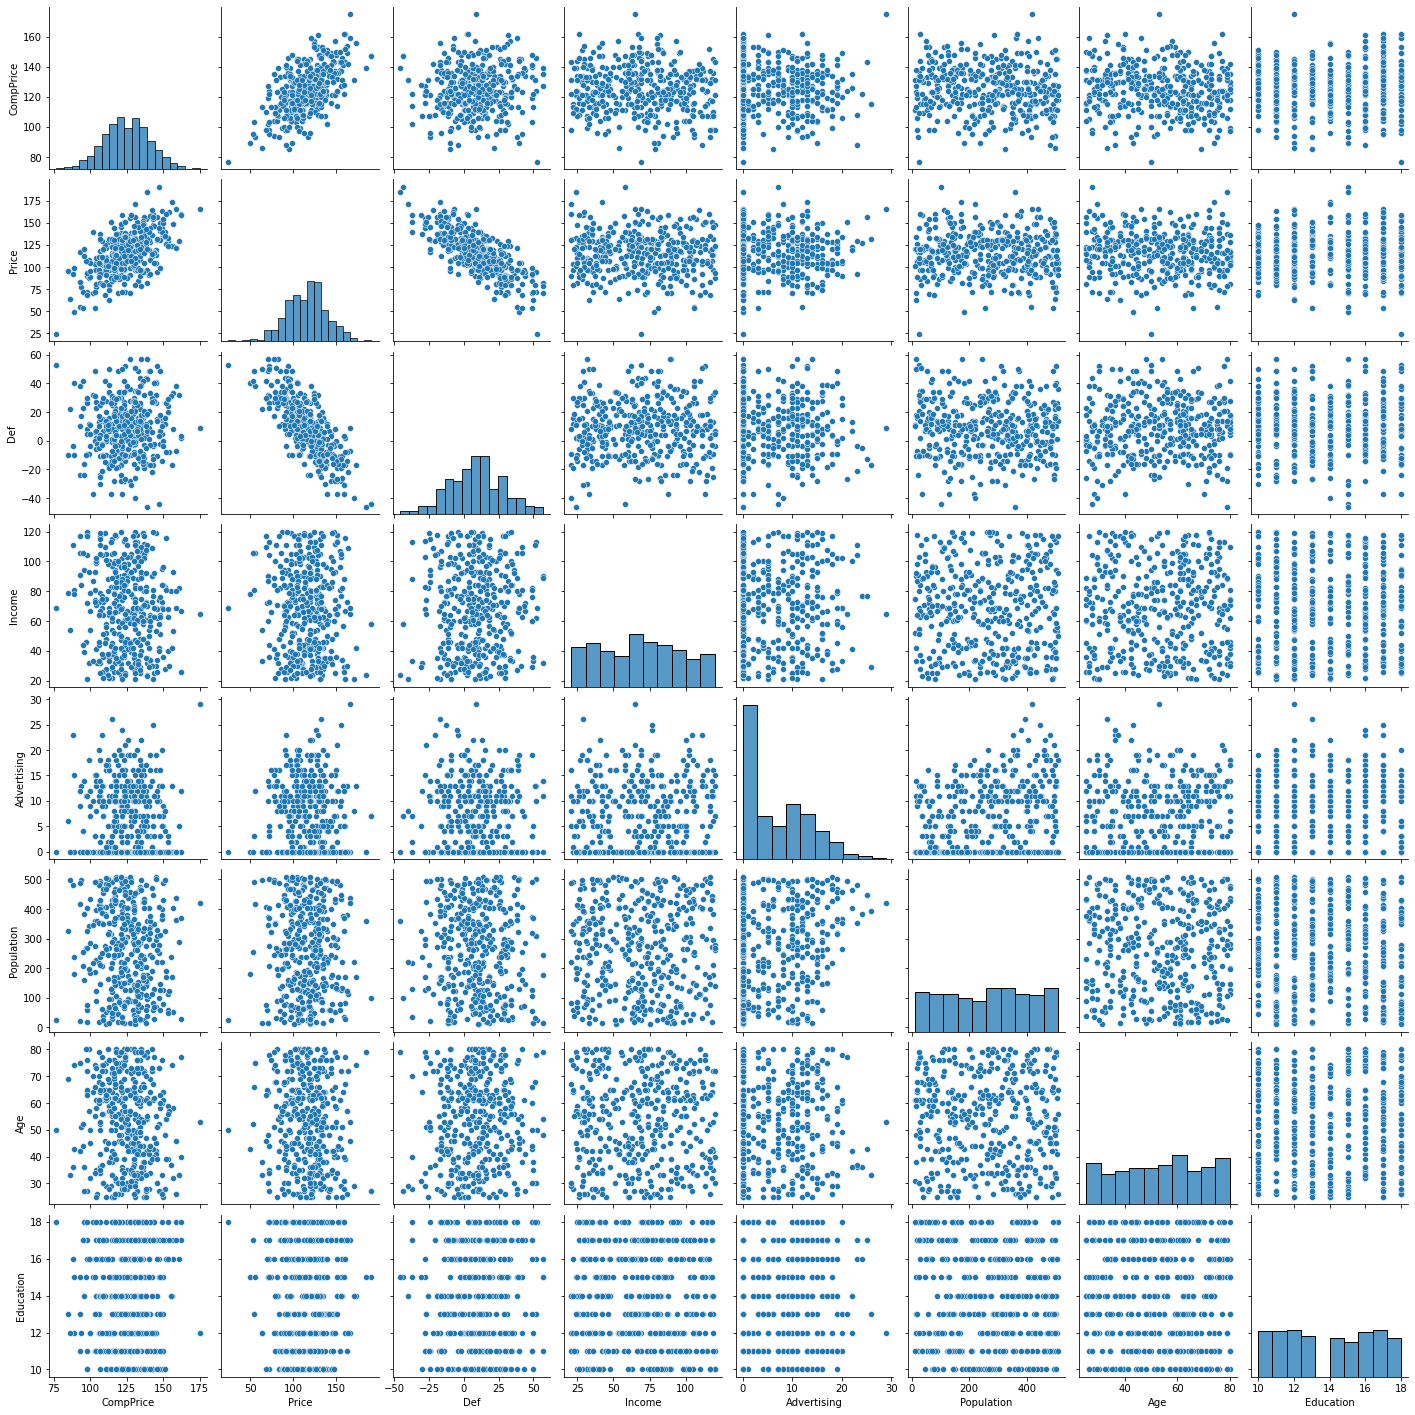

In [ ]:
import seaborn as sns
sns.pairplot(data=company)


In [ ]:
copy.corr()

,CompPrice,Price,Def,Income,Advertising,Population,ShelveLoc,Age,Education,Urban,US,Sales
CompPrice,1.000000,0.584848,0.077210,-0.080653,-0.024199,-0.094707,-0.038549,-0.100239,0.025197,0.066594,0.016869,-0.035578
Price,0.584848,1.000000,-0.763566,-0.056698,0.044537,-0.012144,-0.050924,-0.102177,0.011747,0.047016,0.057861,0.392275
Def,0.077210,-0.763566,1.000000,0.005484,-0.074006,-0.060467,0.031905,0.045793,0.005620,-0.004776,-0.057691,-0.510486
Income,-0.080653,-0.056698,0.005484,1.000000,0.058995,-0.007877,0.053465,-0.004670,-0.056855,0.037967,0.089601,-0.123460
Advertising,-0.024199,0.044537,-0.074006,0.058995,1.000000,0.265652,-0.056552,-0.004557,-0.033594,0.042035,0.684460,-0.251910
Population,-0.094707,-0.012144,-0.060467,-0.007877,0.265652,1.000000,0.020614,-0.042663,-0.106378,-0.052025,0.060564,-0.069327
ShelveLoc,-0.038549,-0.050924,0.031905,0.053465,-0.056552,0.020614,1.000000,-0.014149,0.025723,0.075404,-0.047378,0.397795
Age,-0.100239,-0.102177,0.045793,-0.004670,-0.004557,-0.042663,-0.014149,1.000000,0.006488,0.028479,0.008652,0.186707
Education,0.025197,0.011747,0.005620,-0.056855,-0.033594,-0.106378,0.025723,0.006488,1.000000,-0.033094,-0.078250,0.028847
Urban,0.066594,0.047016,-0.004776,0.037967,0.042035,-0.052025,0.075404,0.028479,-0.033094,1.000000,0.047085,0.047090


In [ ]:
from sklearn.model_selection import train_test_split
x = copy.drop('Sales',axis = 1)
y = copy['Sales']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier as RF
model =RF(n_jobs=4,n_estimators = 150, oob_score =True,criterion ='entropy') 
model.fit(xtrain,ytrain)
prediction = model.predict(x)

In [ ]:
model.oob_score_

0.7875

In [ ]:
copy['Prediction'] = prediction
company['Prediction'] = prediction
company['Prediction'] = company['Prediction'].map({0:'High',1:'Low'})
copy = copy[col]
company

C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1356295179.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Prediction'] = prediction
C:\Users\HP\AppData\Local\Temp\ipykernel_6520\1356295179.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  company['Prediction'] = company['Prediction'].map({0:'High',1:'Low'})


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Prediction
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High,Low
1,111,48,16,260,83,Good,65,10,Yes,Yes,High,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,low,Low
4,141,64,3,340,128,Bad,38,13,Yes,No,low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,High,High
396,139,23,3,37,120,Medium,55,11,No,Yes,low,Low
397,162,26,12,368,159,Medium,40,18,Yes,Yes,low,Low
398,100,79,7,284,95,Bad,50,12,Yes,Yes,low,Low


In [ ]:
copy

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales,Prediction
0,138,73,11,276,120,2,42,17,0,0,0,1
1,111,48,16,260,83,0,65,10,0,0,0,0
2,113,35,10,269,80,1,59,12,0,0,0,0
3,117,100,4,466,97,1,55,14,0,0,1,1
4,141,64,3,340,128,2,38,13,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,0,33,14,0,0,0,0
396,139,23,3,37,120,1,55,11,1,0,1,1
397,162,26,12,368,159,1,40,18,0,0,1,1
398,100,79,7,284,95,2,50,12,0,0,1,1


In [ ]:
incorrect = sum(abs(copy['Sales']-copy['Prediction']))
eficay = (400-incorrect)*100/400
print('The model is ',eficay,"% effecient")

The model is  96.75 % effecient
